# Bruteforcing the optimal Clustering method

Since we don't have information on the number of clusters (nor the best algorithm / approach we should investigate). 

We might just have to try..
 
#### **On this notebook we don't do anything fancy..**

We just try to find the number of clusters (also clustering algorithm / other hyperparameters) by trial and error (and LB submission).

- Nothing more.
- Nothing less. 

I'll keep updating this notebook with new methods / hyperparameters as I try to "hill climb" this notebook over the LB. 

**Make sure to check the previous versions so you can see what works**
> - Use it as a reference for what you should / shoudn't try yourself. 
> - Saving you some time on failed attempts

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

In [2]:
df = pd.read_csv("../input/tabular-playground-series-jul-2022/data.csv")

In [3]:
df.shape

(98000, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [5]:
df = df.drop(columns = "id")
cols = list(df.columns)

In [6]:
int_cols = [i for i in df.columns if df[i].dtype == int]
float_cols = [i for i in df.columns if df[i].dtype == float]

In [7]:
print("Number of missing values: ", df.isna().sum().sum())

Number of missing values:  0


## Preprocessing
- Here we try out different preprocessing pipelines

In [8]:
X_scaled = RobustScaler().fit(df).transform(df)
X_scaled = PowerTransformer().fit(X_scaled).transform(X_scaled)

X_scaled = pd.DataFrame(X_scaled, columns = cols)

## Clustering Algorithm
- Here we define what clustering algorithm are we going to use

In [9]:
ALGORITHM = BayesianGaussianMixture

## Additional Hyperparameters
- We now define a set of hyperparameters that we are **not** going to search values for. 
- We simply set them to be the same for all instances of our algorithm. 

In [10]:
additional_hyperparams = dict(
    
                                covariance_type = 'full',
                                random_state = 1
                             
                             )

**Plotting the data before we start searching**

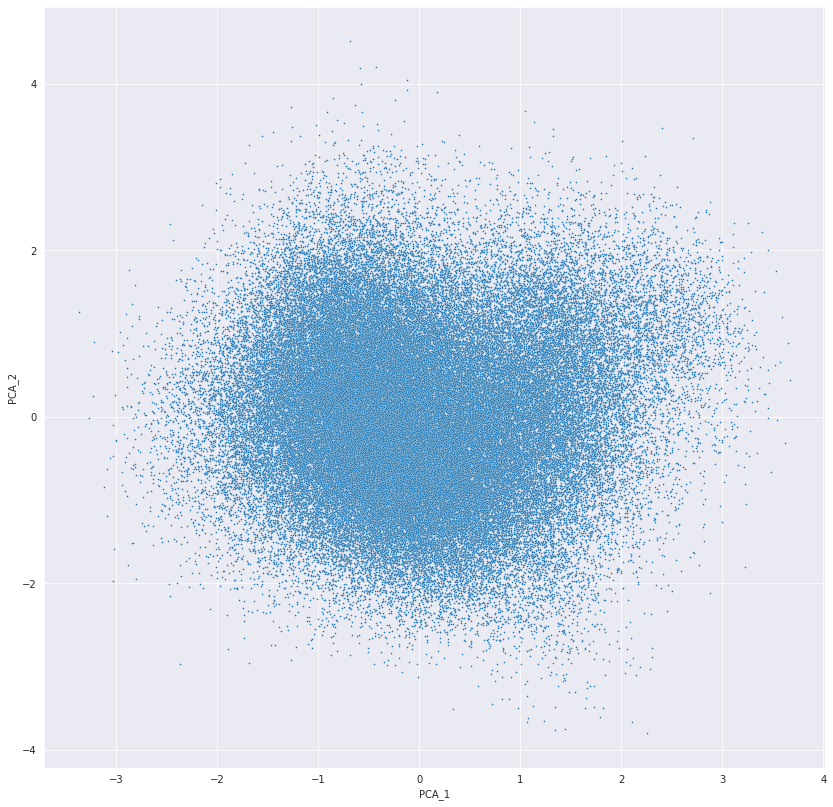

In [11]:
pca = PCA(random_state = 10, whiten = True)
X_pca = pca.fit_transform(X_scaled)
PCA_df = pd.DataFrame({"PCA_1" : X_pca[:,0], "PCA_2" : X_pca[:,1]})
plt.figure(figsize=(14, 14))
sns.scatterplot(data = PCA_df, x = "PCA_1", y = "PCA_2", s=3);

_____

# Brute Force 🔥
## Searching for the optimal hyperparameters
- We now search the range of possible values to assign to our algorithm hyperparameters
- **Note:** The final one we use each time is names `preds_1`, this allows it to be used at the end of the notebook for submission.

### n_components = 2

<AxesSubplot:xlabel='x', ylabel='y'>

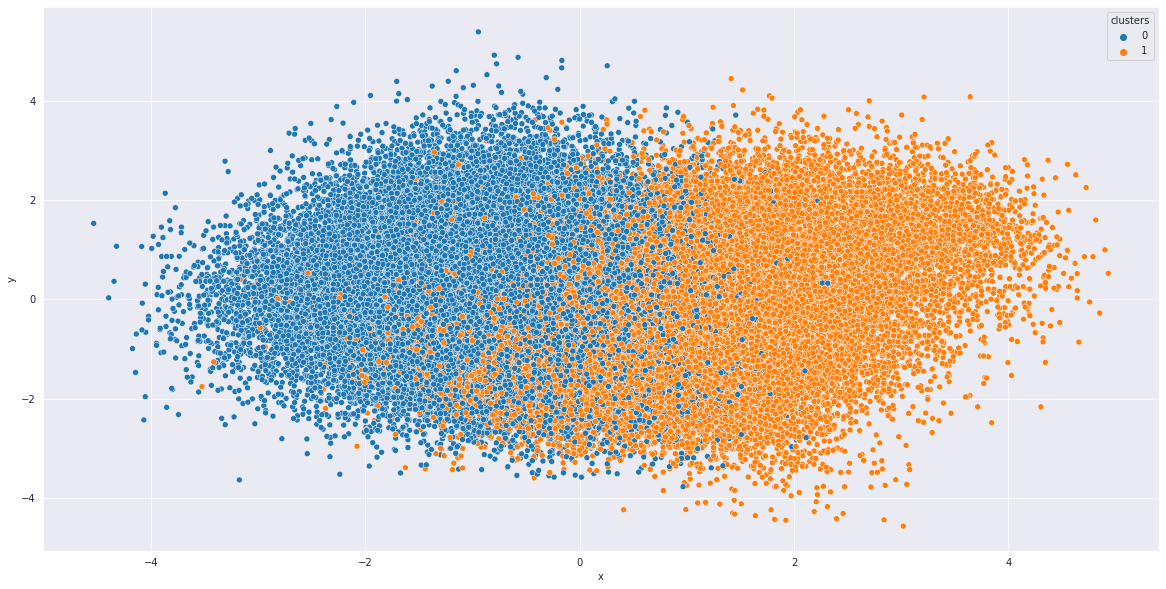

In [12]:
gmm = ALGORITHM(n_components = 2, **additional_hyperparams)
preds = gmm.fit_predict(X_scaled)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
df = pd.DataFrame({"x" : reduced_data[:,0], "y" : reduced_data[:,1], "clusters" : preds})
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"])

### n_components = 3

/opt/conda/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


<AxesSubplot:xlabel='x', ylabel='y'>

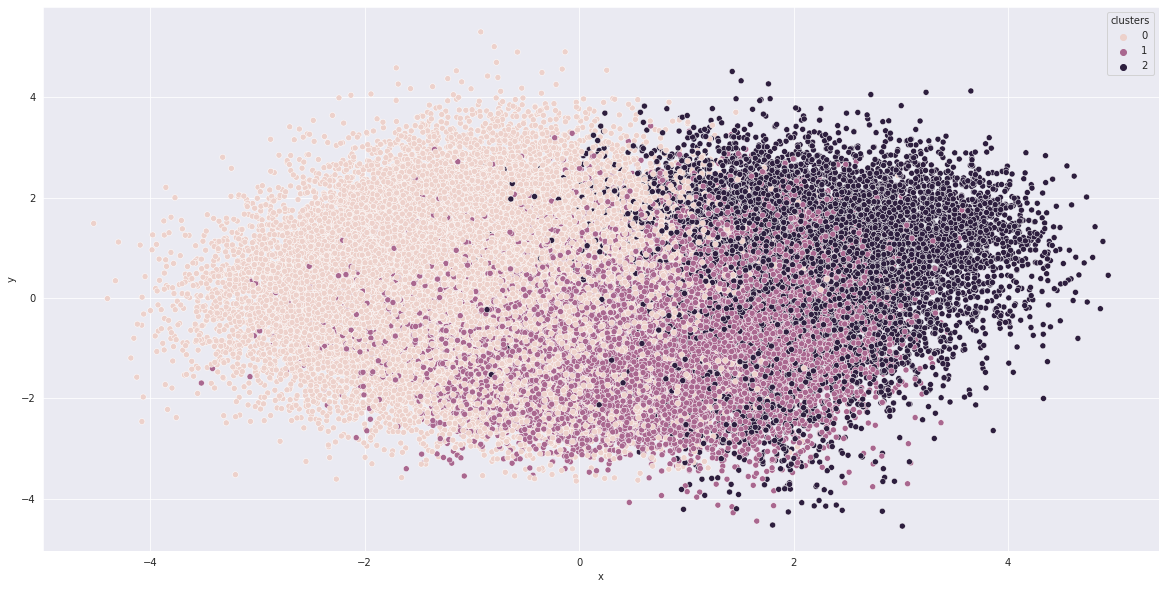

In [13]:
gmm = ALGORITHM(n_components=3, **additional_hyperparams)
preds = gmm.fit_predict(X_scaled)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
df = pd.DataFrame({"x" : reduced_data[:,0], "y" : reduced_data[:,1], "clusters" : preds})
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"])

### n_components = 4

/opt/conda/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


<AxesSubplot:xlabel='x', ylabel='y'>

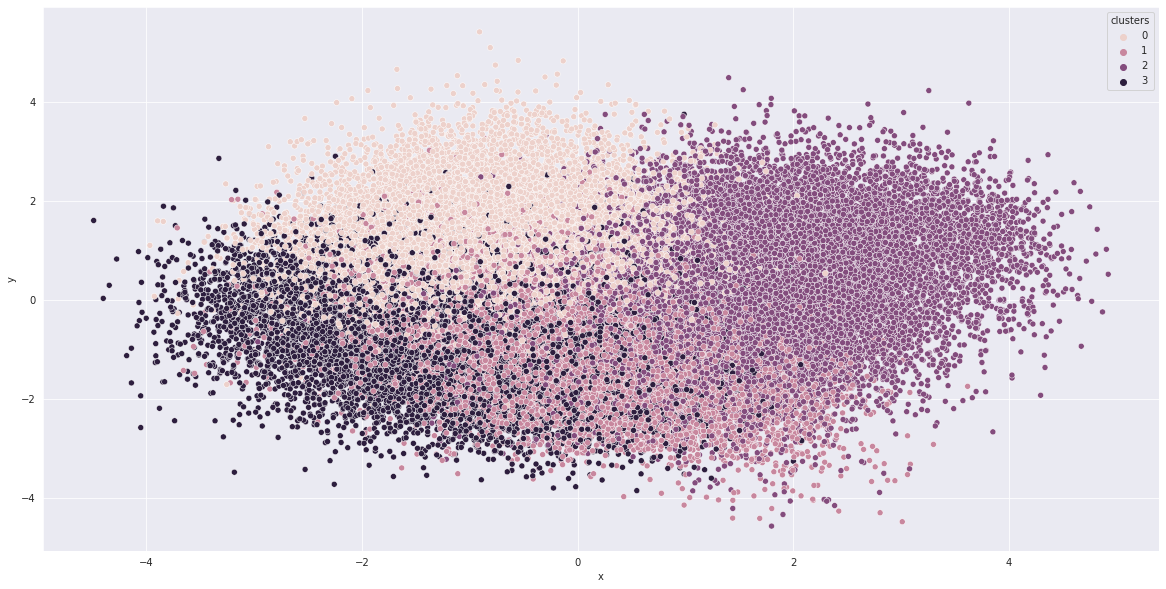

In [14]:
gmm = ALGORITHM(n_components=4, **additional_hyperparams)
preds = gmm.fit_predict(X_scaled)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
df = pd.DataFrame({"x" : reduced_data[:,0], "y" : reduced_data[:,1], "clusters" : preds})
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"])

### n_components = 5

<AxesSubplot:xlabel='x', ylabel='y'>

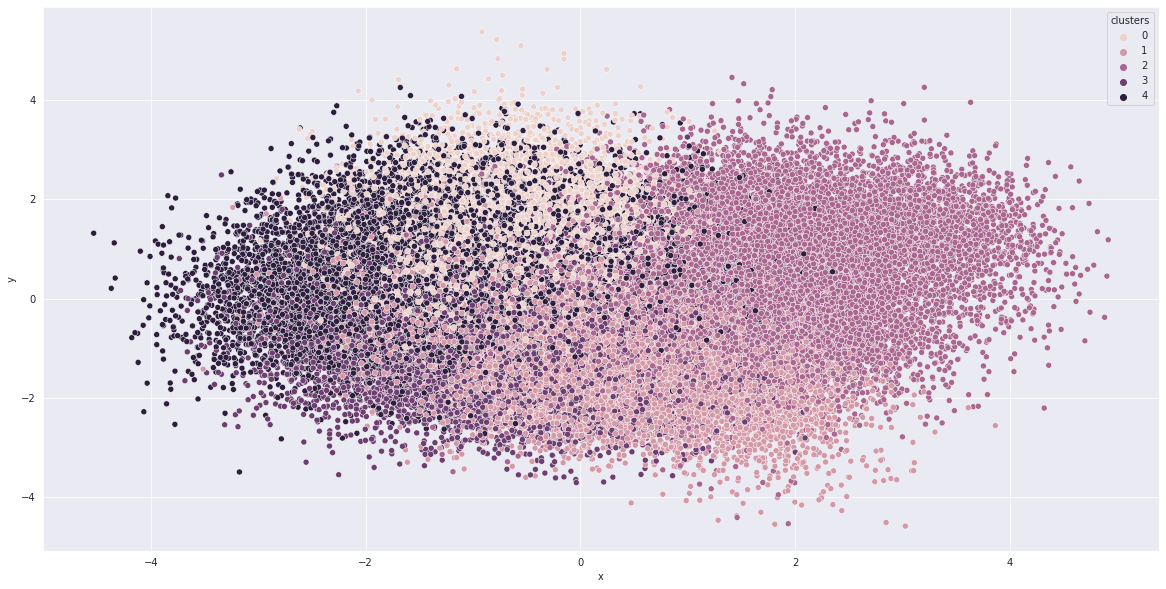

In [15]:
gmm = ALGORITHM(n_components=5, **additional_hyperparams)
preds = gmm.fit_predict(X_scaled)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
df = pd.DataFrame({"x" : reduced_data[:,0], "y" : reduced_data[:,1], "clusters" : preds})
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"])

### n_components = 6

<AxesSubplot:xlabel='x', ylabel='y'>

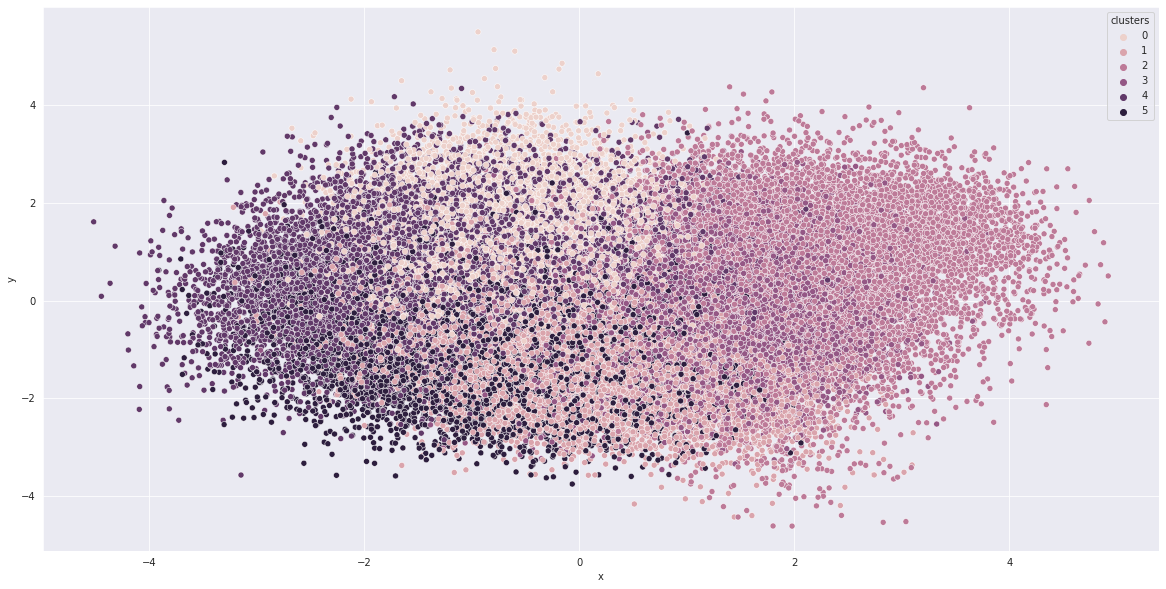

In [16]:
gmm = ALGORITHM(n_components=6, **additional_hyperparams)
preds = gmm.fit_predict(X_scaled)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
df = pd.DataFrame({"x" : reduced_data[:,0], "y" : reduced_data[:,1], "clusters" : preds})
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"])

### n_components = 7

<AxesSubplot:xlabel='x', ylabel='y'>

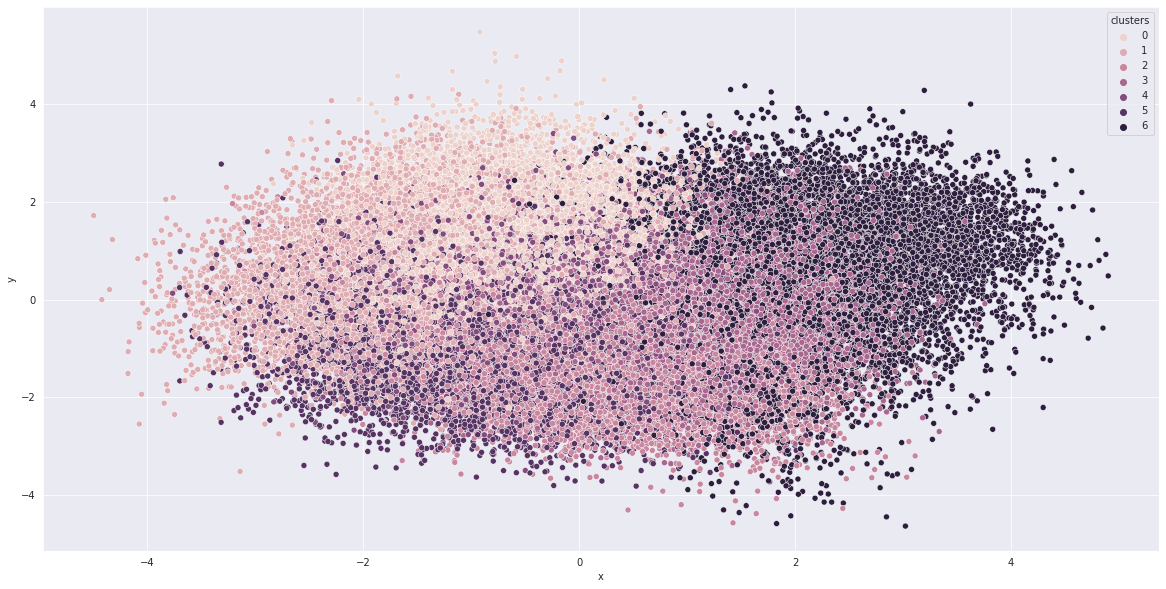

In [17]:
gmm = ALGORITHM(n_components=7, **additional_hyperparams)
preds = gmm.fit_predict(X_scaled)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
df = pd.DataFrame({"x" : reduced_data[:,0], "y" : reduced_data[:,1], "clusters" : preds})
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"])

**Assigning to `preds_1` for submission**

(Move this cell wherever you want to submit different instances to the LB)

In [18]:
# Submission cell
preds_1 = preds

### n_components = 8

/opt/conda/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


<AxesSubplot:xlabel='x', ylabel='y'>

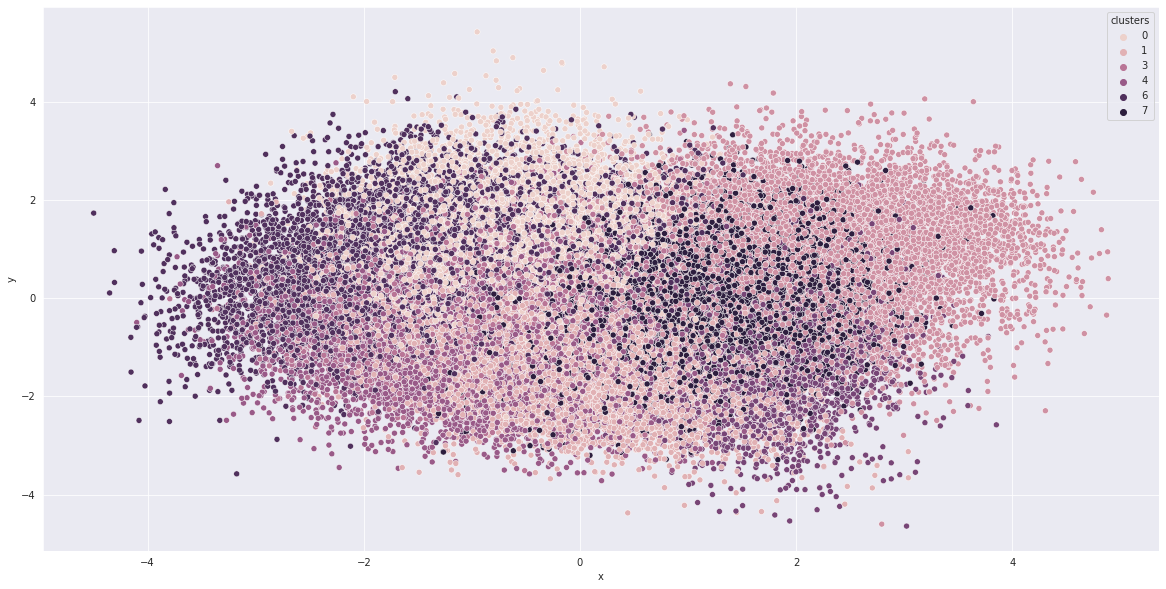

In [19]:
gmm = ALGORITHM(n_components=8, **additional_hyperparams)
preds = gmm.fit_predict(X_scaled)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
df = pd.DataFrame({"x" : reduced_data[:,0], "y" : reduced_data[:,1], "clusters" : preds})
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"])

### n_components = 9

/opt/conda/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


<AxesSubplot:xlabel='x', ylabel='y'>

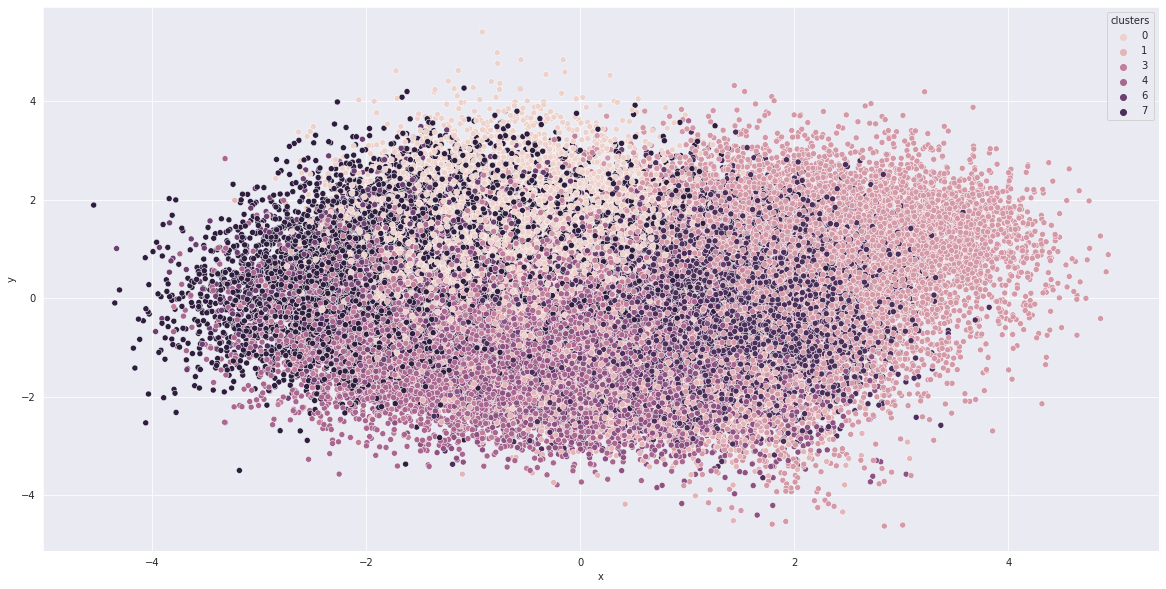

In [20]:
gmm = ALGORITHM(n_components=9, **additional_hyperparams)
preds = gmm.fit_predict(X_scaled)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
df = pd.DataFrame({"x" : reduced_data[:,0], "y" : reduced_data[:,1], "clusters" : preds})
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"])

### n_components = 10

/opt/conda/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


<AxesSubplot:xlabel='x', ylabel='y'>

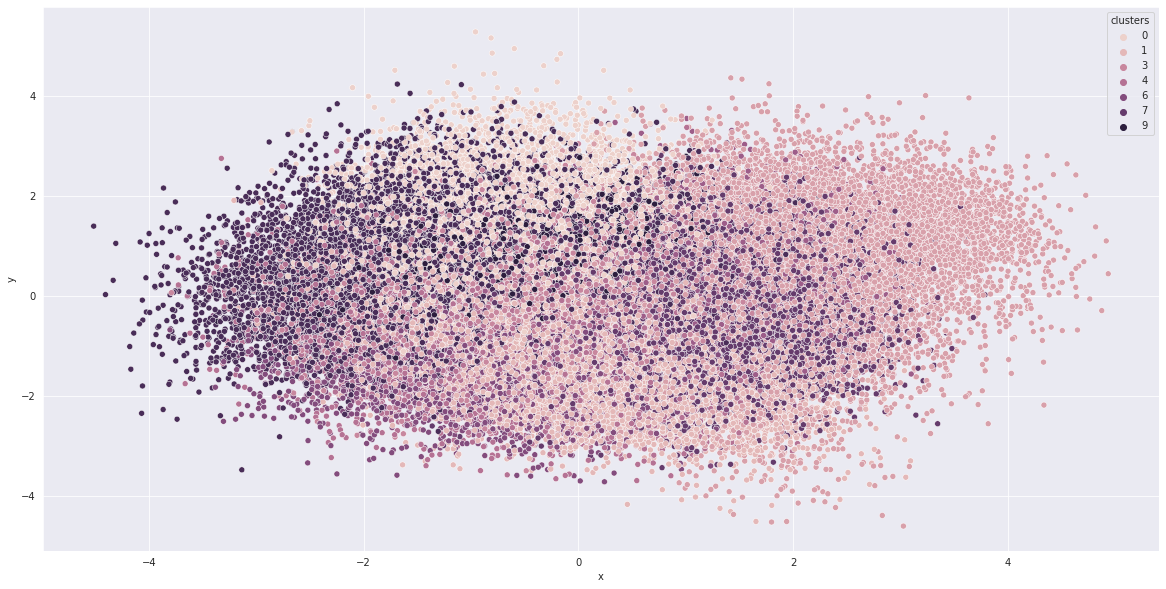

In [21]:
gmm = ALGORITHM(n_components=10, **additional_hyperparams)
preds = gmm.fit_predict(X_scaled)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
df = pd.DataFrame({"x" : reduced_data[:,0], "y" : reduced_data[:,1], "clusters" : preds})
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"])

# Submission

In [22]:
submission = pd.read_csv("../input/tabular-playground-series-jul-2022/sample_submission.csv")

In [23]:
submission["Predicted"] = preds_1
submission

Id  Predicted
0          0          5
1          1          4
2          2          5
3          3          6
4          4          2
...      ...        ...
97995  97995          4
97996  97996          1
97997  97997          3
97998  97998          0
97999  97999          1

[98000 rows x 2 columns]

In [24]:
submission.to_csv('submission.csv', index=False)